In [14]:
!pip install seaborn matplotlib pandas

In [40]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()


file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)


Saving icidentesxestacion.xlsx to icidentesxestacion (7).xlsx


,Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,...,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Active_Shooter_FBI,Shots_Fired,LAT,LNG
83,20231226RIEME,12,26,2023,2023-12-26,Emma G. Whiteknact Elementary School,0,1,1,0,...,No,No,No,No,No,NaN,No,1,41.815518,-71.365550
84,20231220TXEAF,12,20,2023,2023-12-20,Eastern Hills High School,0,0,0,0,...,No,No,No,No,No,NaN,No,1,32.747908,-97.233047
85,20231220NJKIN,12,20,2023,2023-12-20,KIPP Life Academy,0,1,1,0,...,No,No,No,No,No,NaN,No,11,40.717273,-74.217075
86,20231219COLEC,12,19,2023,2023-12-19,Legacy Peak Elementary School,0,2,2,0,...,No,No,No,No,No,NaN,No,10,38.957547,-104.707813
87,20231219TXCYK,12,19,2023,2023-12-19,Cypress Lakes High School,1,0,1,0,...,No,No,No,No,No,No,No,99,29.856129,-95.705023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,20000126CAALM,1,26,2000,2000-01-26,Alicia Reyes Elementary School,0,0,0,0,...,No,No,No,Yes,No,No,NaN,5,37.287308,-120.496096
2002,20000120NCERA,1,20,2000,2000-01-20,Erwin High School,0,0,0,0,...,No,No,No,No,No,No,Yes,1,35.619126,-82.626511
2003,20000119FLRIN,1,19,2000,2000-01-19,Ridgewood High School,1,0,1,0,...,No,No,No,No,No,No,NaN,1,28.271424,-82.687720
2004,20000113NMALA,1,13,2000,2000-01-13,Albuquerque High School,0,0,0,0,...,No,No,No,No,No,Yes,NaN,5,35.097222,-106.635166


<ipython-input-31-603096665adf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incident_counts.index, y=incident_counts.values, palette=sns.color_palette("OrRd", n_colors=len(incident_counts)))


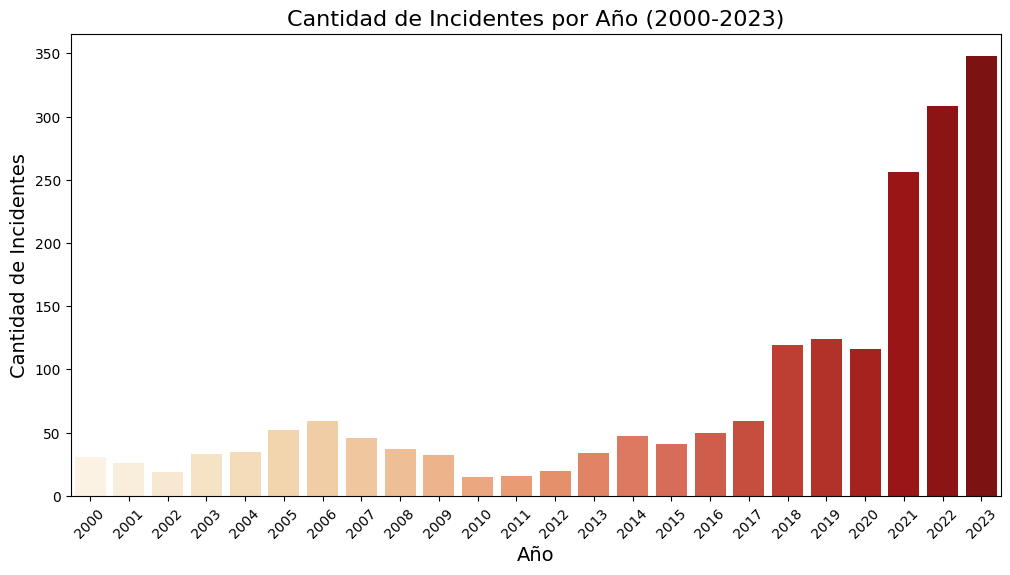

In [31]:

df_filtered = df[(df['Year'] >= 2000) & (df['Year'] <= 2023)]
display(df_filtered)

incident_counts = df_filtered['Year'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.barplot(x=incident_counts.index, y=incident_counts.values, palette=sns.color_palette("OrRd", n_colors=len(incident_counts)))


plt.title('Cantidad de Incidentes por Año (2000-2023)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de Incidentes', fontsize=14)
plt.xticks(rotation=45)


plt.show()


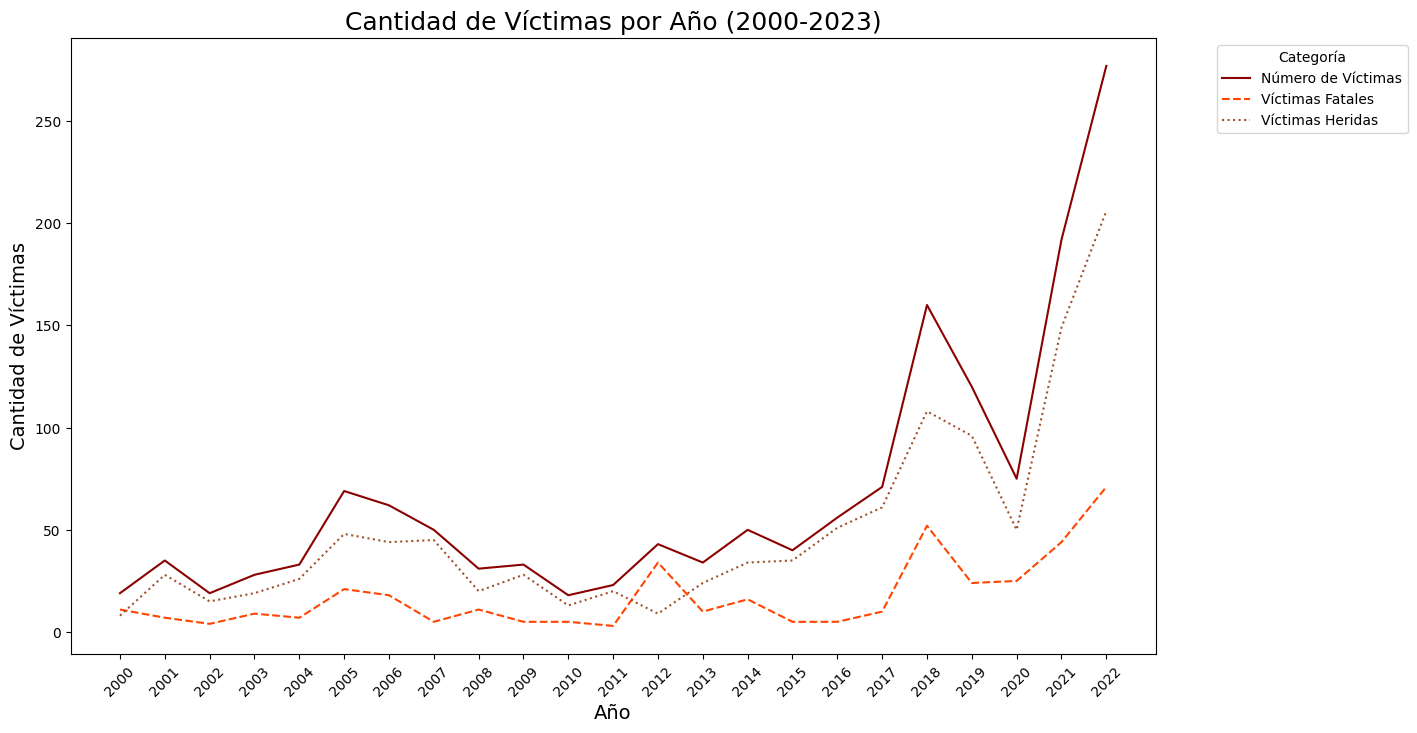

In [43]:
df_filtered = df[(df['Year'] >= 2000) & (df['Year'] <= 2023)]

columns_to_sum = ['Victims_Killed', 'Victims_Wounded', 'Number_Victims']
yearly_data = df_filtered.groupby('Year')[columns_to_sum].sum().reset_index()

years = pd.DataFrame({'Year': range(2000, 2023)})

yearly_data = years.merge(yearly_data, on='Year', how='left').fillna(0)

plt.figure(figsize=(14, 8))

sns.lineplot(x='Year', y='Number_Victims', data=yearly_data, label='Número de Víctimas', color='darkred', linestyle='-')
sns.lineplot(x='Year', y='Victims_Killed', data=yearly_data, label='Víctimas Fatales', color='orangered', linestyle='--')
sns.lineplot(x='Year', y='Victims_Wounded', data=yearly_data, label='Víctimas Heridas', color='sienna', linestyle=':')

plt.title('Cantidad de Víctimas por Año (2000-2023)', fontsize=18)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de Víctimas', fontsize=14)

plt.xticks(yearly_data['Year'], rotation=45)

plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()